In [47]:
# !git clone https://github.com/shaker113/group5_Price_Forecast.git

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math



In [49]:
df=pd.read_csv('food_prices_jor.csv')
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

df.head()

,date,market,category,commodity,unit,price,H-date,year
0,2011-01-15,National Average,cereals and tubers,Bread (pita),KG,0.16,10/02/1432,2011
1,2011-01-15,National Average,cereals and tubers,Rice (imported),KG,0.90,11/02/1432,2011
2,2011-01-15,National Average,oil and fats,Oil (vegetable),1.8 L,1.50,12/02/1432,2011
3,2011-01-15,National Average,pulses and nuts,Pulses,KG,1.20,13/02/1432,2011
4,2011-02-15,National Average,cereals and tubers,Bread (pita),KG,0.16,14/02/1432,2011


In [50]:
df['category'].unique()


array(['cereals and tubers', 'oil and fats', 'pulses and nuts',
       'meat, fish and eggs', 'milk and dairy', 'miscellaneous food',
       'vegetables and fruits', 'non-food'], dtype=object)

In [51]:
column='category'
value='non-food'

In [52]:
priceMean = df[ (df[column] == value) ].groupby('year')
priceMean['price'].mean()
market=['Al Aqaba','Amman','Irbid','Maan','Al Karak']
m_price_change= pd.DataFrame({'Year':['2017', '2018', '2019','2020','2021','2022']})
m_price_change[value+' Mean']=df[(df[column]==value)  & (df['year']>2016)].groupby('year')['price'].mean().reset_index(name=' avg_prices').drop('year',axis=1)
for i in market:
  m_price_change[value+' '+i]=df[(df[column]==value) & (df['market']==i) & (df['year']>2016)].groupby('year')['price'].mean().reset_index(name=' avg_prices').drop('year',axis=1)
 
m_price_change

,Year,non-food Mean,non-food Al Aqaba,non-food Amman,non-food Irbid,non-food Maan,non-food Al Karak
0,2017,2.721250,2.721111,2.721111,2.721111,2.721111,2.721111
1,2018,2.791667,2.791667,2.791667,2.791667,2.791667,2.791667
2,2019,2.777500,2.777500,2.777500,2.777500,2.777500,2.777500
3,2020,2.720231,2.719722,2.725833,2.719722,2.719722,2.719722
4,2021,2.226250,2.226250,2.226250,2.226250,2.226250,2.226250
5,2022,2.334792,2.334792,2.334792,2.334792,2.334792,2.334792


In [53]:
min=m_price_change[value+' Mean'].min()
max=m_price_change[value+' Mean'].max()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


non-foodComparison of price change


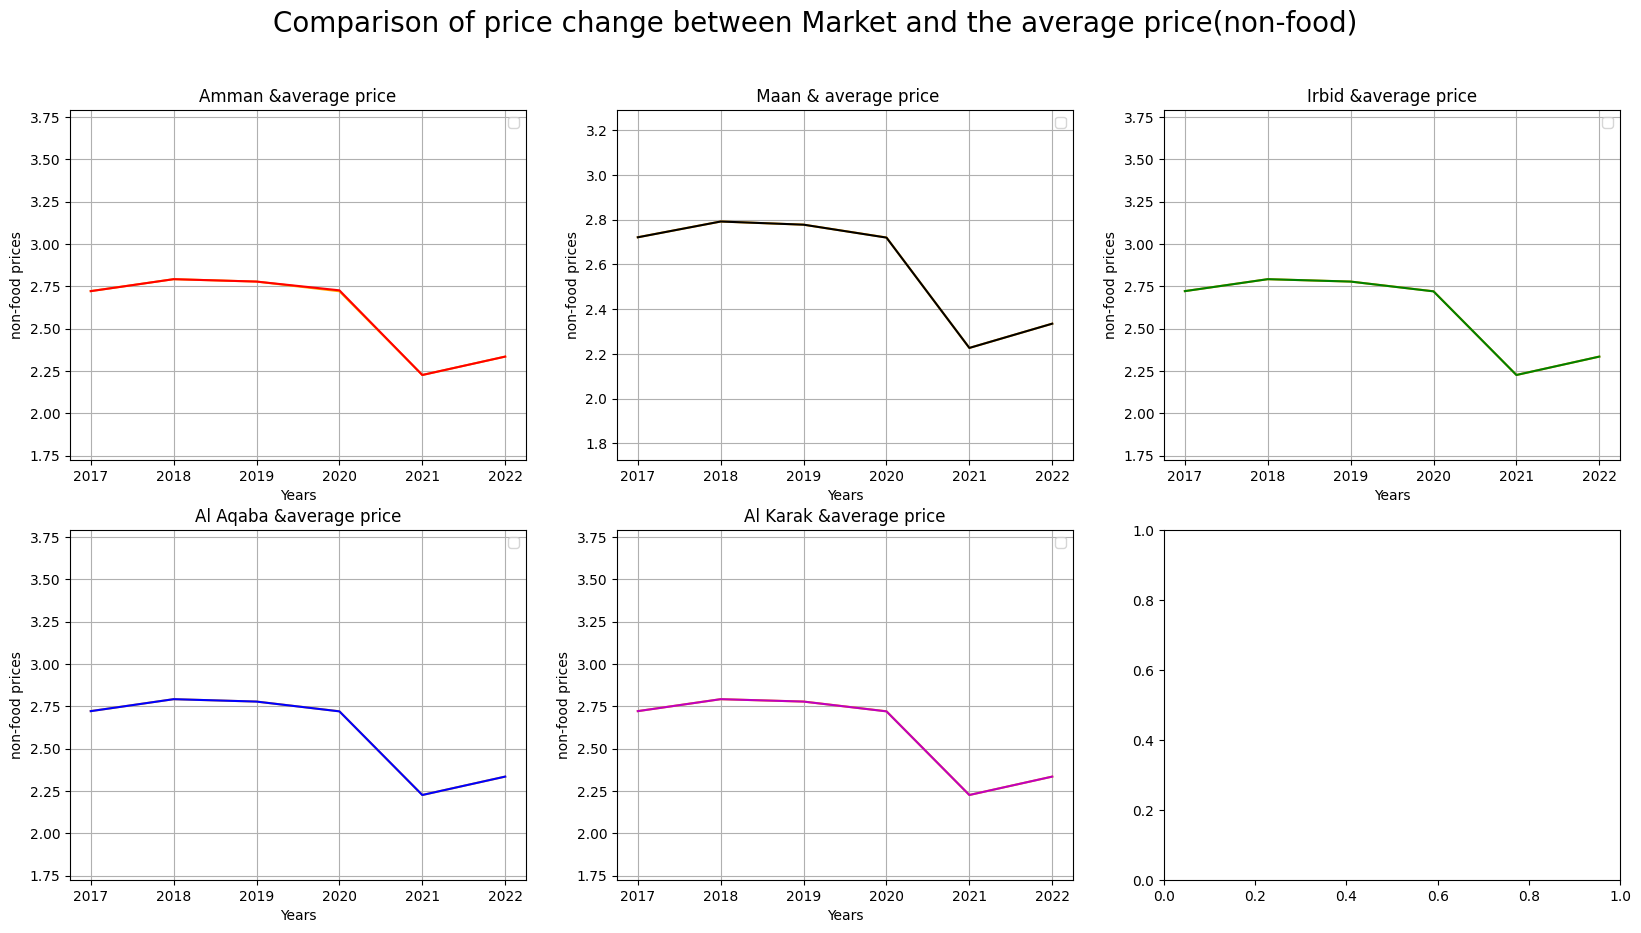

In [54]:
figure, axis = plt.subplots(2,3)
plt.suptitle('Comparison of price change between Market and the average price('+value+') ',size=20)

#ax.set_xticklabels(value+' prices')
print(value +'Comparison of price change')
axis[0,0].plot(m_price_change['Year'],m_price_change[value+' Mean'] ,color ='orange')
axis[0,0].plot(m_price_change['Year'],m_price_change[value+' Amman'],color = 'red')
axis[0,0].set_title( 'Amman &average price')
axis[0,0].set_ylabel(value+' prices')
axis[0,0].set_xlabel('Years')
axis[0,0].legend()
axis[0,0].grid()
axis[0,0].set_ylim([min-.5,max+1])


  
axis[0,1].plot(m_price_change['Year'],m_price_change[value+' Mean'] ,color ='orange')
axis[0,1].plot(m_price_change['Year'],m_price_change[value+' Maan'],color = 'black')
axis[0,1].set_title(' Maan & average price')
axis[0,1].set_ylabel(value+' prices')
axis[0,1].set_xlabel('Years')
axis[0,1].legend()
axis[0,1].grid()
axis[0,1].set_ylim([min-.5,max+.5])


axis[1,0].plot(m_price_change['Year'],m_price_change[value+' Mean'] ,color ='orange')
axis[1,0].plot(m_price_change['Year'],m_price_change[value+' Al Aqaba'],color = 'blue')
axis[1,0].set_title('Al Aqaba &average price')
axis[1,0].set_ylabel(value+' prices')
axis[1,0].set_xlabel('Years')
axis[1,0].legend()
axis[1,0].grid()
axis[1,0].set_ylim([min-.5,max+1])


axis[1,1].plot(m_price_change['Year'],m_price_change[value+' Mean'] ,color ='orange')
axis[1,1].plot(m_price_change['Year'],m_price_change[value+' Al Karak'],color = 'm')
axis[1,1].set_title('Al Karak &average price')
axis[1,1].set_ylabel(value+' prices')
axis[1,1].set_xlabel('Years')
axis[1,1].legend()
axis[1,1].grid()
axis[1,1].set_ylim([min-.5,max+1])



axis[0,2].plot(m_price_change['Year'],m_price_change[value+' Mean'] ,color ='orange')
axis[0,2].plot(m_price_change['Year'],m_price_change[value+' Irbid'],color = 'green')
axis[0,2].set_title('Irbid &average price')
axis[0,2].set_ylabel(value+' prices')
axis[0,2].set_xlabel('Years')
axis[0,2].legend()
axis[0,2].grid()
axis[0,2].set_ylim([min-.5,max+1])



figure.set_figwidth(20)
figure.set_figheight(10)
#plt.xlabel('Years')
#plt.ylabel(value+' prices')
#plt.title(value +' prices change compared to Mean')
  


plt.show()

In [55]:
an_m_price_change= pd.DataFrame({'Year':['2017', '2018', '2019','2020','2021','2022']})
an_m_price_change[value+'_Mean annually change ']=m_price_change[value+' Mean'].pct_change()
for i in market:
  an_m_price_change[value+'_annually change'+i]= m_price_change[value+' '+i].pct_change()
an_m_price_change

,Year,non-food_Mean annually change,non-food_annually changeAl Aqaba,non-food_annually changeAmman,non-food_annually changeIrbid,non-food_annually changeMaan,non-food_annually changeAl Karak
0,2017,NaN,NaN,NaN,NaN,NaN,NaN
1,2018,0.025877,0.025929,0.025929,0.025929,0.025929,0.025929
2,2019,-0.005075,-0.005075,-0.005075,-0.005075,-0.005075,-0.005075
3,2020,-0.020619,-0.020802,-0.018602,-0.020802,-0.020802,-0.020802
4,2021,-0.181595,-0.181442,-0.183277,-0.181442,-0.181442,-0.181442
5,2022,0.048755,0.048755,0.048755,0.048755,0.048755,0.048755
